In [1]:
#fetching the data 
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd
#loading the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()
#gives us the info of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()
#shows us the summary of the numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


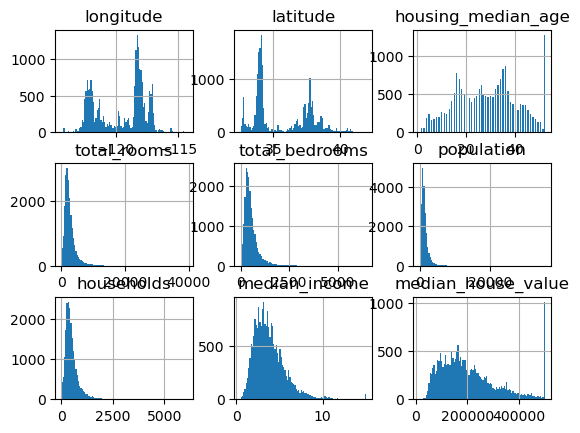

In [7]:
# we are going to a plot a histogram based on the given database
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100)
plt.show()

In [8]:
#now we are going to create a testset
#to reduce overfitting we will do this

#pick random data instances sizze f 20% dataset

import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

test_ratio=0.2

In [9]:
train_set=split_train_test(housing, test_ratio)
print(train_set)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10849    -117.91     33.65                14.0       2598.0           759.0   
318      -122.19     37.76                38.0       1493.0           370.0   
1669     -122.23     38.06                52.0       1350.0           266.0   
14264    -117.10     32.69                35.0       1292.0           272.0   
17441    -120.45     34.66                 7.0       3329.0           504.0   
...          ...       ...                 ...          ...             ...   
15105    -117.01     32.83                17.0      15401.0          3280.0   
12776    -121.41     38.64                38.0       1384.0           287.0   
4377     -118.27     34.09                48.0       1527.0           295.0   
14233    -117.01     32.70                 7.0       2327.0           490.0   
1054     -121.82     39.76                23.0       6010.0          1116.0   

       population  households  median_income  medi

In [10]:
#everytime u initialize the split function it randomly
#picks out the data instances from the database, so we have to 
#find a solution for the above



In [20]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2,random_state=42)

In [21]:
print(train_set)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  media

In [23]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])

In [24]:
#now we are going to perform stratified sampling based on the
#income category. 


from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
    

    

In [25]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
# now we will be removing the income_cat attribute so data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [26]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

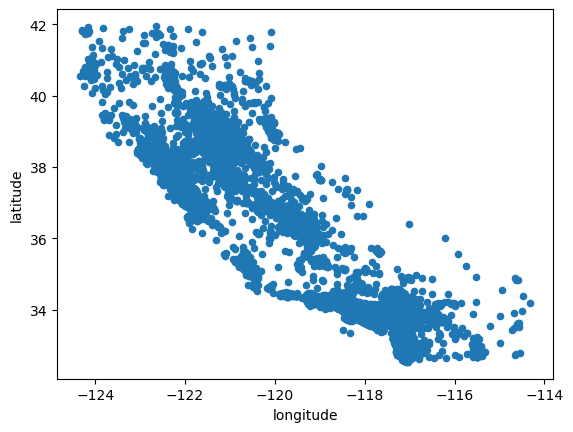

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

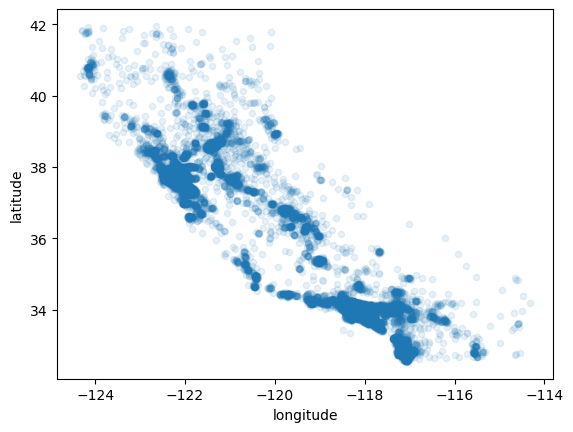

In [28]:
#alpha enables us to visualise the density of data points
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

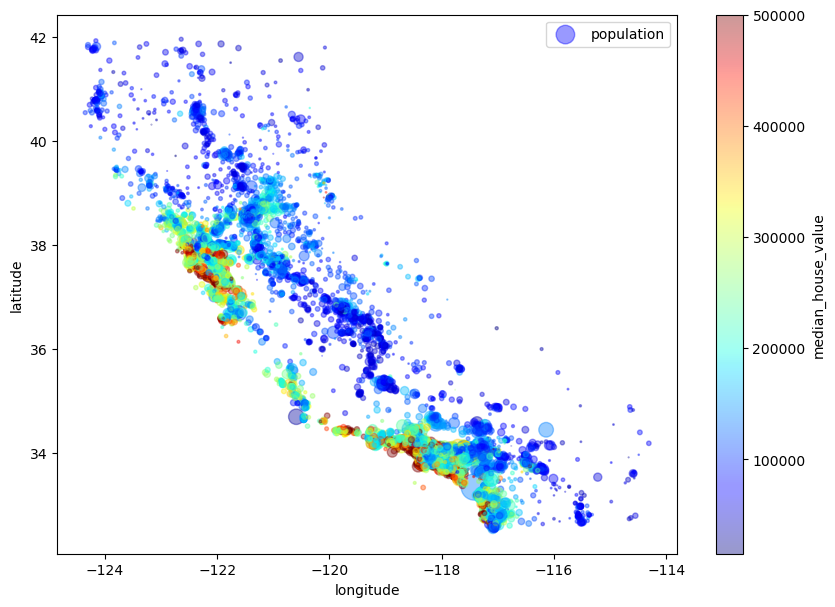

In [29]:
housing.plot(kind = "scatter", x="longitude",y="latitude", alpha=0.4,
               s=housing["population"]/100, label="population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
              )
plt.legend()

In [30]:
# the above data shows us that the prices are related to location



In [44]:
#now we will be looking for correlation 


import pandas as pd

corr_matrix= housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
income_cat                    0.642256
ocean_proximity_<1H OCEAN     0.259521
ocean_proximity_NEAR BAY      0.158691
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

In [39]:
#as we can see in the above output, there is significant correlation between the median house values
#and the median house value

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>]], dtype=object)

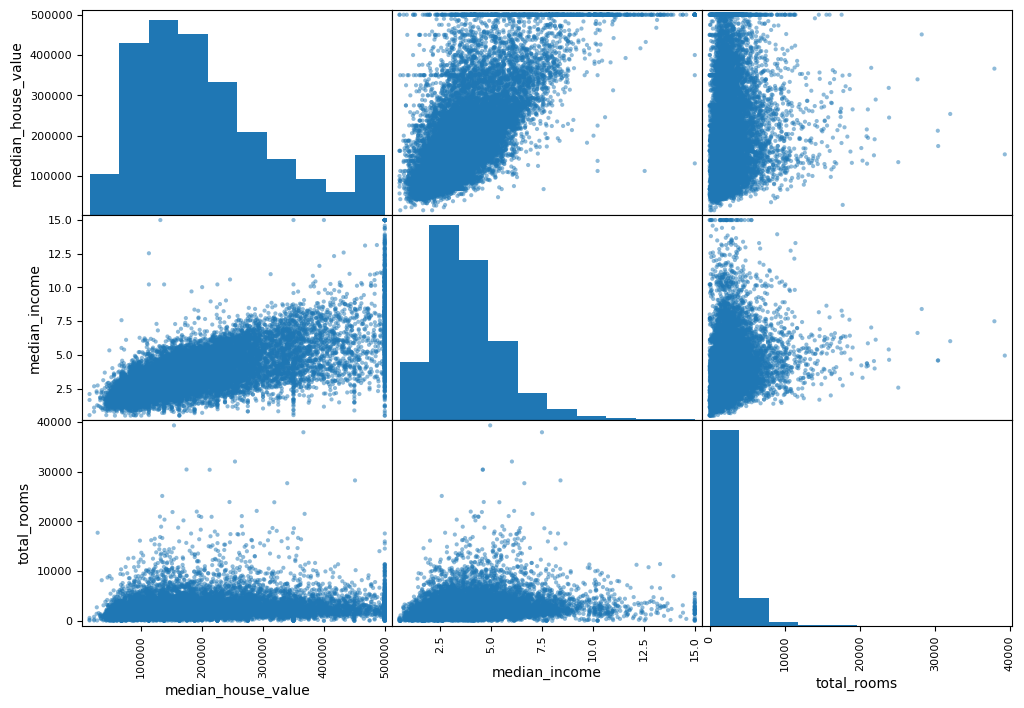

In [47]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

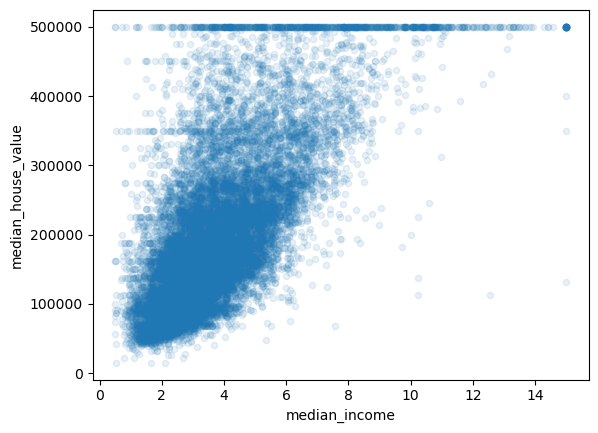

In [51]:
housing.plot(kind="scatter",x="median_income", y="median_house_value",
                alpha=0.1)

In [52]:
#in the above plot, we can see that the correation is indeed very strong
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
# above code is to create new variables for experimenting


In [53]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value            1.000000
median_income                 0.687151
income_cat                    0.642256
ocean_proximity_<1H OCEAN     0.259521
ocean_proximity_NEAR BAY      0.158691
rooms_per_household           0.146255
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population_per_household     -0.021991
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
bedrooms_per_room            -0.259952
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

In [54]:
#it's time to prepare our data 


In [57]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [59]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="median")

housing_num=housing.drop("ocean_proximity", axis=1)


In [60]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])